In [1]:
from scipy.io import loadmat

In [2]:
resp = loadmat("cars_annos.mat")

In [4]:
type(resp)

dict

In [5]:
resp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [6]:
resp.get("annotations")

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

In [9]:
resp.get("class_names")

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

In [10]:
len(resp.get("class_names")[0])

196

In [11]:
len(resp.get("annotations")[0])

16185

In [ ]:
# Yolo - 3-4-5 - Text format
# Detectron - 
# Tensorflow OD API - TFRECORD







In [34]:
classes = []
for class_name in resp.get("class_names")[0]:
    classes.append(class_name[0])

In [49]:
data = []

for annot in resp.get("annotations")[0]:
    image_name = annot[0][0].split("/")[-1]
    xmin = int(annot[1][0][0])
    ymin = int(annot[2][0][0])
    xmax = int(annot[3][0][0])
    ymax = int(annot[4][0][0])
    class_name = classes[annot[5][0][0] - 1]
    test = int(annot[6][0][0])
    
    #data.append([image_name, xmin, ymin, xmax, ymax, class_name, test])
    data.append({
        'image' : image_name, 'xmin' : xmin, 'ymin' : ymin, 'xmax' : xmax, 
        'ymax' : ymax, 'class' : class_name, 'test' : test
                })

# Save as CSV

In [36]:
import pandas as pd

In [39]:
df = pd.DataFrame(data, columns=['image', 'xmin', 'ymin', 'xmax', 'ymax', 'class', 'test'])

In [41]:
df

,image,xmin,ymin,xmax,ymax,class,test
0,000001.jpg,112,7,853,717,AM General Hummer SUV 2000,0
1,000002.jpg,48,24,441,202,AM General Hummer SUV 2000,0
2,000003.jpg,7,4,277,180,AM General Hummer SUV 2000,0
3,000004.jpg,33,50,197,150,AM General Hummer SUV 2000,0
4,000005.jpg,5,8,83,58,AM General Hummer SUV 2000,0
...,...,...,...,...,...,...,...
16180,016181.jpg,38,36,375,234,smart fortwo Convertible 2012,1
16181,016182.jpg,29,34,235,164,smart fortwo Convertible 2012,1
16182,016183.jpg,25,32,587,359,smart fortwo Convertible 2012,1
16183,016184.jpg,56,60,208,186,smart fortwo Convertible 2012,1


In [40]:
df.to_csv("labels.csv", index=None)

# Save as JSON

In [50]:
import json

In [51]:
with open("labels.json", "w") as file:
    json.dump(data, file, indent=4)

## Visualize

In [52]:
import cv2
import matplotlib.pyplot as plt
import os

In [53]:
images_dir = "car_ims_2/car_ims_2/car_ims/"

In [54]:
len(os.listdir(images_dir))

16185

In [56]:
from random import shuffle

In [57]:
shuffle(data)

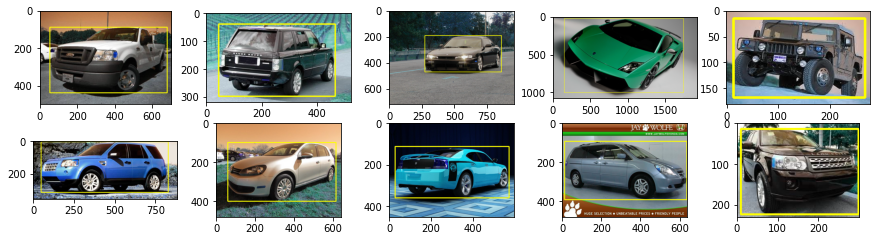

In [62]:
plt.figure(figsize=(15, 10))
for index, annotation in enumerate(data[:10]):
    image = cv2.imread(images_dir + annotation['image'])
    image = cv2.rectangle(image, (annotation['xmin'], annotation['ymin']),
                         (annotation['xmax'], annotation['ymax']), (255, 255, 0), 3)
    plt.subplot(5, 5, index + 1)
    plt.imshow(image)

## Save in text format

In [ ]:
XMIN, YMIN, XMAX, YMAX

YOLO: XMIN, YMIN, WIDTH, HEIGHT

In [67]:
with open("annotation.txt", "w") as file:
    for an in data:
        height = an['ymax'] - an['ymin']
        width = an['xmax'] - an['xmin']
        row = f"{an['image']} {an['xmin']},{an['ymin']},{width},{height}"
        print(row)
    

009355.jpg 52,91,622,349
012669.jpg 45,39,418,258
014049.jpg 275,195,588,279
012471.jpg 150,33,1579,975
000046.jpg 14,16,254,153
012697.jpg 49,4,776,309
015610.jpg 60,99,554,300
007948.jpg 29,112,547,246
010515.jpg 13,93,626,298
012698.jpg 9,14,287,209
013830.jpg 76,58,504,405
013903.jpg 48,87,475,209
013993.jpg 316,260,719,504
006307.jpg 207,387,1239,448
003427.jpg 108,228,450,187
010924.jpg 59,172,665,532
001826.jpg 228,83,1025,804
010097.jpg 24,96,600,318
009739.jpg 8,45,290,100
012345.jpg 97,146,1081,597
001016.jpg 39,166,700,305
013310.jpg 22,57,270,118
003120.jpg 83,76,128,75
003167.jpg 263,123,1203,843
007401.jpg 48,34,352,209
000153.jpg 30,35,589,315
004597.jpg 27,110,379,117
001731.jpg 228,564,1208,461
002354.jpg 62,15,158,126
003568.jpg 172,158,768,471
016098.jpg 8,61,448,310
006659.jpg 4,37,216,82
001370.jpg 9,44,221,90
011928.jpg 48,79,930,521
002257.jpg 20,9,166,83
015331.jpg 38,224,909,295
007697.jpg 284,193,422,264
000939.jpg 43,37,522,300
015129.jpg 31,9,404,235
006062.

008418.jpg 50,56,176,73
013286.jpg 8,175,785,372
004230.jpg 32,90,577,365
006924.jpg 59,108,469,290
003845.jpg 14,11,625,401
001953.jpg 9,12,336,180
002814.jpg 17,32,561,268
002146.jpg 48,151,492,204
005462.jpg 18,99,350,138
013317.jpg 44,96,170,79
015033.jpg 216,37,601,521
015628.jpg 10,13,239,168
009453.jpg 15,90,560,327
004994.jpg 83,67,98,47
006002.jpg 8,70,240,116
011415.jpg 46,30,308,210
016110.jpg 66,43,412,328
010855.jpg 125,39,499,403
014967.jpg 105,141,571,414
006186.jpg 54,36,376,303
000395.jpg 7,13,201,121
011127.jpg 104,77,135,83
004109.jpg 50,21,194,155
002245.jpg 7,1,216,110
008963.jpg 47,102,445,269
002835.jpg 65,319,1083,452
005243.jpg 63,99,525,326
015635.jpg 59,194,1386,786
015747.jpg 43,106,571,244
004209.jpg 14,27,197,122
001102.jpg 40,110,497,182
007710.jpg 8,73,408,211
010367.jpg 13,122,467,164
000771.jpg 37,229,526,200
013814.jpg 113,13,682,575
008742.jpg 7,69,623,321
014138.jpg 56,34,599,390
008828.jpg 16,104,382,167
015641.jpg 10,47,243,101
008918.jpg 30,32,21

004170.jpg 35,64,514,311
008245.jpg 51,371,1136,328
014886.jpg 20,346,2021,1273
002735.jpg 120,130,355,182
005099.jpg 146,105,989,610
015370.jpg 50,74,556,286
007802.jpg 42,1,547,315
003636.jpg 152,175,905,512
004898.jpg 51,55,567,322
016064.jpg 115,96,569,345
011292.jpg 151,150,524,186
014495.jpg 49,30,368,248
012246.jpg 687,569,240,224
001406.jpg 2,15,81,46
005259.jpg 19,53,270,170
008307.jpg 11,25,208,110
004448.jpg 25,70,393,167
013940.jpg 19,229,1782,915
014373.jpg 74,150,296,174
006491.jpg 21,71,603,314
002450.jpg 42,81,199,83
003466.jpg 33,41,457,279
012564.jpg 76,475,873,227
000899.jpg 26,36,276,185
009956.jpg 35,17,572,420
010456.jpg 15,77,439,195
005364.jpg 22,79,385,164
001738.jpg 51,103,233,89
013505.jpg 14,5,374,249
010176.jpg 62,102,145,59
006265.jpg 14,40,247,143
013283.jpg 11,22,383,156
008483.jpg 10,45,186,73
015500.jpg 5,46,251,135
014208.jpg 116,409,1040,344
004829.jpg 70,249,883,341
009397.jpg 31,146,584,298
012394.jpg 41,67,391,219
008451.jpg 24,47,215,113
007552.j

010421.jpg 59,90,479,195
001044.jpg 241,244,1167,684
003766.jpg 63,26,373,270
013187.jpg 4,49,422,248
012123.jpg 20,23,260,141
012662.jpg 9,48,570,362
010531.jpg 205,162,441,354
009630.jpg 43,62,407,258
011102.jpg 20,90,612,249
015262.jpg 8,79,389,161
000965.jpg 86,137,500,197
010483.jpg 18,23,612,438
000897.jpg 6,40,394,206
010196.jpg 705,356,648,392
004695.jpg 114,11,828,698
009406.jpg 19,74,471,267
003759.jpg 27,62,567,177
000883.jpg 116,308,950,455
003032.jpg 95,23,591,414
014233.jpg 100,73,606,443
009977.jpg 13,72,252,91
003586.jpg 16,105,263,161
002883.jpg 34,36,588,269
012608.jpg 6,42,487,254
007693.jpg 74,95,868,572
014203.jpg 43,154,508,169
015765.jpg 147,178,804,455
012769.jpg 576,327,957,838
010464.jpg 23,78,578,325
012720.jpg 1,59,399,181
003407.jpg 56,153,522,233
002143.jpg 181,124,1599,933
010037.jpg 120,151,414,194
012631.jpg 114,59,393,274
000375.jpg 61,27,828,306
002206.jpg 159,432,1303,464
007497.jpg 11,51,431,147
011907.jpg 79,42,838,622
011501.jpg 49,83,1024,682
004

000876.jpg 23,109,414,204
001250.jpg 85,43,516,367
001460.jpg 2,16,198,73
006419.jpg 57,258,935,419
000668.jpg 74,73,165,85
010267.jpg 38,58,366,235
009156.jpg 118,421,1341,423
004503.jpg 39,5,195,169
007569.jpg 46,14,446,332
012701.jpg 79,139,368,178
013359.jpg 105,412,1058,404
007359.jpg 2,35,249,157
014511.jpg 31,46,396,209
013754.jpg 63,71,906,548
009084.jpg 25,96,430,223
009815.jpg 26,113,586,259
006289.jpg 127,49,425,282
005404.jpg 206,352,1207,407
000004.jpg 33,50,164,100
004881.jpg 11,148,492,176
006995.jpg 97,101,398,268
006768.jpg 2,15,262,139
015999.jpg 18,81,467,253
015652.jpg 35,21,187,143
002626.jpg 18,55,607,334
002634.jpg 69,282,1128,503
007110.jpg 1,85,575,215
012844.jpg 6,17,294,119
004040.jpg 90,210,507,207
014252.jpg 52,219,530,162
008295.jpg 14,22,242,140
014725.jpg 81,19,322,240
015906.jpg 120,105,511,293
010692.jpg 26,31,355,220
005841.jpg 83,182,490,220
001843.jpg 376,206,579,334
005592.jpg 15,16,458,313
002016.jpg 75,133,952,644
002978.jpg 16,9,602,405
006152.j

007645.jpg 79,191,516,285
008090.jpg 22,23,404,203
008336.jpg 92,108,360,211
013437.jpg 103,70,831,618
013162.jpg 5,41,186,101
011383.jpg 30,11,383,305
013236.jpg 51,320,945,443
005363.jpg 4,49,624,280
006273.jpg 32,114,656,292
005493.jpg 40,247,1539,660
015978.jpg 148,123,398,272
004637.jpg 27,71,603,351
002638.jpg 39,149,561,296
009484.jpg 65,59,705,360
009283.jpg 81,70,434,222
010657.jpg 48,63,368,215
006673.jpg 34,60,183,98
005392.jpg 57,44,389,279
003802.jpg 111,82,563,299
012963.jpg 58,354,683,204
004718.jpg 47,60,561,349
007309.jpg 68,91,539,263
000673.jpg 12,67,484,199
001626.jpg 76,71,403,171
007347.jpg 83,55,382,269
013860.jpg 44,15,582,398
012366.jpg 268,144,1377,934
000863.jpg 25,156,596,196
001026.jpg 45,45,554,386
000628.jpg 45,22,709,438
010478.jpg 32,97,587,206
002801.jpg 168,88,415,164
002796.jpg 19,51,264,138
014396.jpg 102,343,583,227
002731.jpg 32,70,180,106
015058.jpg 11,69,358,191
006481.jpg 8,35,146,57
012065.jpg 213,37,457,284
009747.jpg 48,89,545,318
003923.jpg

012028.jpg 84,23,821,621
014115.jpg 1,328,757,445
005868.jpg 30,81,342,163
001856.jpg 54,94,557,299
003353.jpg 69,41,408,241
005064.jpg 105,3,764,697
005624.jpg 34,105,399,217
005791.jpg 61,169,457,174
007314.jpg 11,15,286,186
012979.jpg 22,85,508,342
014734.jpg 25,24,402,257
000096.jpg 2,24,286,105
003704.jpg 3,75,295,106
015831.jpg 72,104,476,291
015796.jpg 195,248,659,309
014684.jpg 292,148,1014,912
013270.jpg 19,21,225,162
015324.jpg 22,51,454,232
004730.jpg 31,41,241,148
009168.jpg 116,141,805,438
010701.jpg 28,64,424,216
006096.jpg 69,109,593,341
013807.jpg 28,39,418,189
005413.jpg 43,164,560,191
009953.jpg 21,35,258,160
011402.jpg 42,66,419,206
014180.jpg 23,105,724,318
005808.jpg 18,35,232,132
008651.jpg 76,50,134,74
002521.jpg 18,28,207,92
006942.jpg 47,95,801,527
006216.jpg 181,253,1320,642
002977.jpg 66,46,479,380
012013.jpg 13,35,626,418
007051.jpg 37,126,926,608
007849.jpg 39,248,697,255
009463.jpg 38,104,561,281
009570.jpg 31,65,444,262
014175.jpg 77,42,478,343
011327.jpg

001484.jpg 41,114,934,556
009273.jpg 5,46,247,105
014471.jpg 44,92,402,217
013954.jpg 339,496,1079,525
015795.jpg 55,147,839,419
005757.jpg 49,59,905,551
014029.jpg 108,292,1135,558
010745.jpg 40,80,527,286
000405.jpg 181,51,246,181
012391.jpg 49,93,176,76
014494.jpg 123,344,1072,320
010108.jpg 24,113,363,139
009258.jpg 54,61,525,347
011741.jpg 104,111,414,267
013033.jpg 21,26,284,174
001672.jpg 17,71,210,104
015511.jpg 19,18,235,180
000671.jpg 11,56,602,241
000833.jpg 80,164,598,225
008795.jpg 14,78,991,631
013553.jpg 119,215,1034,504
009346.jpg 48,24,717,480
003772.jpg 56,199,1154,484
006004.jpg 13,27,252,138
004825.jpg 49,138,511,248
002984.jpg 190,780,3159,1176
010806.jpg 20,8,165,105
003216.jpg 177,299,553,374
008335.jpg 46,26,222,193
009866.jpg 68,87,841,544
011156.jpg 95,1,458,257
014932.jpg 79,259,845,440
000483.jpg 530,618,1411,492
000906.jpg 22,206,492,157
014295.jpg 76,104,379,180
011022.jpg 216,214,600,233
001242.jpg 9,151,465,149
007175.jpg 25,19,169,124
007979.jpg 127,123

005281.jpg 349,229,888,678
011984.jpg 15,53,609,380
014531.jpg 142,69,611,382
012923.jpg 76,32,194,140
015281.jpg 101,141,618,309
003584.jpg 189,218,874,370
010904.jpg 72,117,687,353
013323.jpg 19,32,263,172
008760.jpg 34,197,619,198
010373.jpg 1,63,499,202
015611.jpg 2,9,229,154
005534.jpg 37,65,421,256
015173.jpg 143,74,360,328
002555.jpg 157,138,574,458
003367.jpg 49,156,541,257
015222.jpg 21,64,591,239
014542.jpg 39,36,244,112
014379.jpg 23,53,235,91
001076.jpg 52,47,534,213
004084.jpg 11,37,430,169
008428.jpg 109,89,358,191
013307.jpg 30,78,594,330
012991.jpg 36,38,430,163
013934.jpg 555,278,988,929
010988.jpg 146,56,541,450
011315.jpg 23,118,585,231
006629.jpg 108,95,513,297
010091.jpg 236,177,481,278
004587.jpg 29,211,590,199
010160.jpg 344,156,1008,842
008751.jpg 13,31,236,130
014247.jpg 17,66,497,185
001468.jpg 1,37,295,134
012541.jpg 75,260,848,333
004698.jpg 73,42,458,420
015449.jpg 9,33,244,141
010818.jpg 57,40,338,232
004456.jpg 27,96,742,248
013373.jpg 84,94,196,67
001148

011925.jpg 523,249,562,339
002114.jpg 32,42,436,266
002728.jpg 48,49,548,401
016165.jpg 93,234,394,230
004116.jpg 82,193,810,384
007434.jpg 26,157,991,512
006711.jpg 25,110,589,259
010651.jpg 30,14,252,185
003109.jpg 71,85,556,299
011079.jpg 8,17,380,270
012412.jpg 34,191,711,270
009099.jpg 8,41,389,241
015833.jpg 120,97,757,586
010510.jpg 34,48,338,179
005602.jpg 23,31,215,109
014224.jpg 38,178,565,193
007163.jpg 38,6,557,470
007648.jpg 51,110,461,232
000258.jpg 9,97,484,155
005661.jpg 2,58,305,107
003876.jpg 43,78,518,355
010306.jpg 95,130,893,555
004952.jpg 63,93,417,179
001514.jpg 34,37,222,123
009649.jpg 29,51,230,136
001221.jpg 7,97,306,90
005322.jpg 105,182,809,425
011959.jpg 20,132,493,233
008863.jpg 18,22,274,141
004504.jpg 673,981,3605,1572
006852.jpg 16,57,228,113
000072.jpg 6,20,131,53
002471.jpg 8,40,239,116
002865.jpg 224,260,672,377
007132.jpg 38,171,476,208
014002.jpg 393,449,849,465
012465.jpg 61,93,694,197
008938.jpg 3,41,430,190
001727.jpg 53,60,171,92
005063.jpg 58,

009802.jpg 18,115,600,341
004675.jpg 61,77,482,342
011974.jpg 206,173,599,305
011834.jpg 16,75,558,218
008809.jpg 39,105,563,262
001194.jpg 175,280,1311,756
003947.jpg 38,32,569,307
009847.jpg 92,57,521,344
009322.jpg 4,42,412,303
014480.jpg 169,258,917,483
009349.jpg 15,56,454,256
010379.jpg 5,88,495,169
004011.jpg 51,37,519,318
006617.jpg 28,103,979,583
008940.jpg 87,132,585,231
011410.jpg 12,31,459,319
004400.jpg 66,247,912,280
012900.jpg 31,32,179,126
005235.jpg 32,72,579,213
011640.jpg 41,35,551,342
006935.jpg 47,76,603,355
009553.jpg 28,101,249,94
004746.jpg 27,52,450,233
008557.jpg 49,80,181,86
016020.jpg 17,12,258,171
006879.jpg 44,139,485,255
014101.jpg 132,48,401,347
006960.jpg 35,33,308,173
003527.jpg 38,105,1527,635
004160.jpg 41,78,949,633
000921.jpg 21,1,365,199
016038.jpg 10,26,264,136
003418.jpg 27,103,726,258
003417.jpg 38,212,759,270
012360.jpg 342,148,1063,803
011578.jpg 133,368,1178,560
007252.jpg 135,195,780,534
006064.jpg 59,42,567,437
015516.jpg 56,83,369,172
001